In [ ]:
import os

In [ ]:
from google.colab import drive

In [ ]:
os.getcwd()

'/content'

In [ ]:
from google.colab import files
files.upload()


Saving waste_2.csv to waste_2.csv


{'waste_2.csv': b'dropoff_site,load_id,load_time,load_type,report_date,route_number,route_type,load_weight\r\nMRF,328118,27-05-2009 12:55,RECYCLING - SINGLE STREAM,27-05-2009,DW1,RECYCLING - SINGLE STREAM,4060\r\nBRAKER SITE,308336,16-12-2008 10:55,SWEEPING,16-12-2008,NW10-R,STREET CLEANING-RESIDENTIAL,\r\nTDS - MRF,541514,06-09-2012 13:56,RECYCLING - SINGLE STREAM,06-09-2012,RHBU20,RECYCLING - SINGLE STREAM,5060\r\nTDS LANDFILL,689059,14-03-2016 07:56,SWEEPING,14-03-2016,DSS04,SWEEPER DUMPSITES,3720\r\nHORNSBY BEND,108272,02-12-2004 15:29,YARD TRIMMING,02-12-2004,YH08,YARD TRIMMINGS,13840\r\nMRF,238174,02-08-2007 15:58,RECYCLING - COMINGLE,02-08-2007,RH13,RECYCLING,2180\r\nTDS LANDFILL,165520,15-02-2006 12:15,GARBAGE COLLECTIONS,15-02-2006,PW12,GARBAGE COLLECTION,15720\r\nTDS LANDFILL,138656,25-07-2005 15:00,GARBAGE COLLECTIONS,25-07-2005,PAM02,GARBAGE COLLECTION,13220\r\nMRF,289079,16-07-2008 00:00,RECYCLING - PAPER,16-07-2008,RW13,RECYCLING,3780\r\nTDS LANDFILL,267634,29-02-2008 11:

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
#import fancyimpute
#from fancyimpute import KNN
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import chi2_contingency
import statsmodels.api as sm
from statsmodels.formula.api import ols
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
from xgboost import XGBRegressor
import xgboost as xgb

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.externals import joblib

In [ ]:
training = pd.read_csv('waste_2.csv')

In [ ]:
training.shape

(10768, 8)

In [ ]:
training.head()

,dropoff_site,load_id,load_time,load_type,report_date,route_number,route_type,load_weight
0,MRF,328118,27-05-2009 12:55,RECYCLING - SINGLE STREAM,27-05-2009,DW1,RECYCLING - SINGLE STREAM,4060.0
1,BRAKER SITE,308336,16-12-2008 10:55,SWEEPING,16-12-2008,NW10-R,STREET CLEANING-RESIDENTIAL,NaN
2,TDS - MRF,541514,06-09-2012 13:56,RECYCLING - SINGLE STREAM,06-09-2012,RHBU20,RECYCLING - SINGLE STREAM,5060.0
3,TDS LANDFILL,689059,14-03-2016 07:56,SWEEPING,14-03-2016,DSS04,SWEEPER DUMPSITES,3720.0
4,HORNSBY BEND,108272,02-12-2004 15:29,YARD TRIMMING,02-12-2004,YH08,YARD TRIMMINGS,13840.0


In [ ]:
training.dtypes

dropoff_site     object
load_id           int64
load_time        object
load_type        object
report_date      object
route_number     object
route_type       object
load_weight     float64
dtype: object

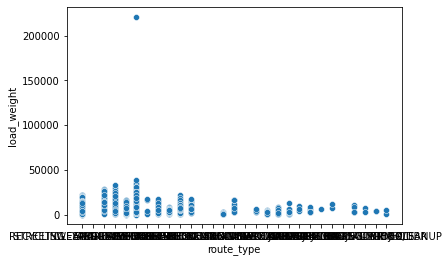

In [ ]:
sns.scatterplot(data=training, x="route_type", y="load_weight")

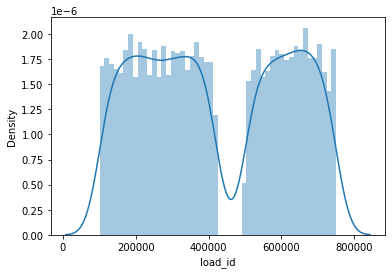

In [ ]:
sns.distplot(training['load_id'],bins=50)

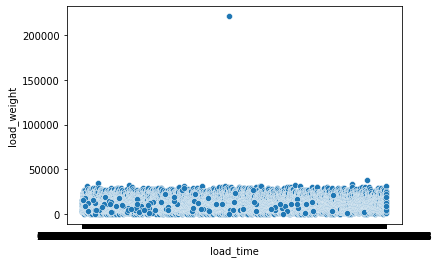

In [ ]:
sns.scatterplot(data=training, x="load_time", y="load_weight")

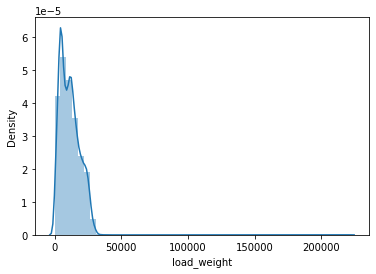

In [ ]:
sns.distplot(training['load_weight'],bins=50)

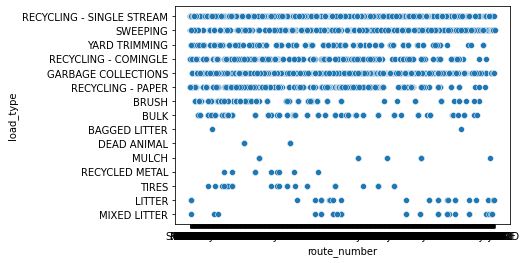

In [ ]:
sns.scatterplot(data=training, x="route_number", y="load_type")

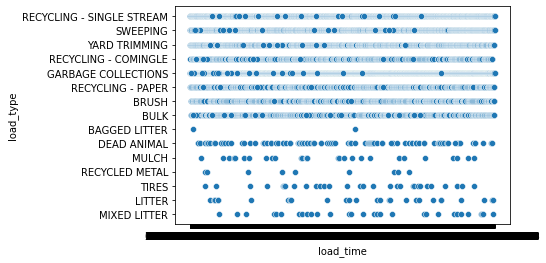

In [ ]:
sns.scatterplot(data=training, x="load_time", y="load_type")

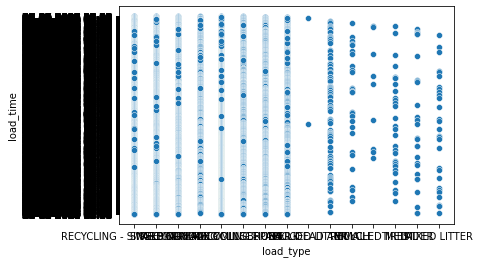

In [ ]:
sns.scatterplot(data=training, x="load_type", y="load_time")

In [ ]:
sns.scatterplot(data=training, x="load_time", y="load_type")

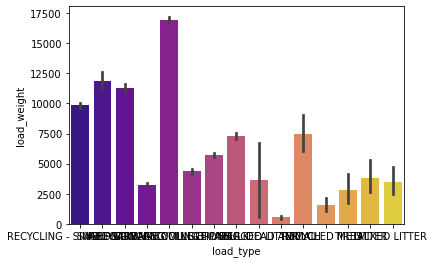

In [ ]:
sns.barplot(x ='load_type', y ='load_weight', data = training, palette ='plasma')

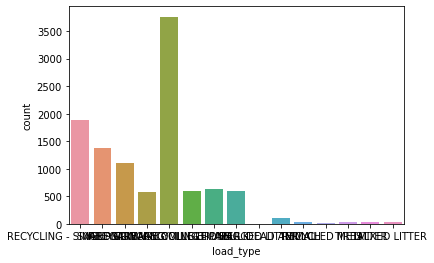

In [ ]:
sns.countplot(x ='load_type', data = training)

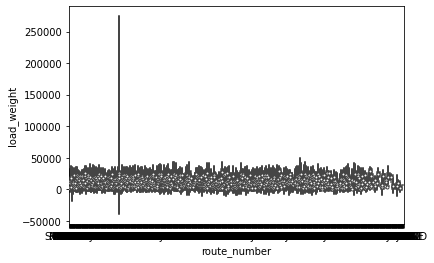

In [ ]:
sns.violinplot(x="route_number", y="load_weight", data = training)

KeyboardInterrupt: ignored

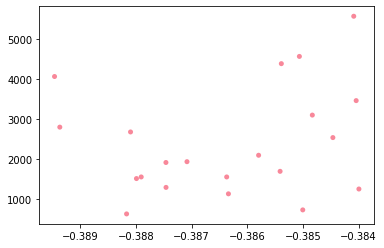

In [ ]:
sns.stripplot(x ='route_number', y ='load_weight', data = training,jitter = True, hue ='route_type', dodge = True)

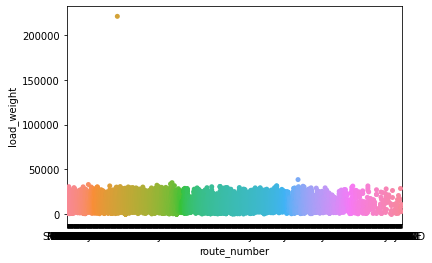

In [ ]:
sns.stripplot(x ='route_number', y ='load_weight', data = training)

In [ ]:
sns.splot

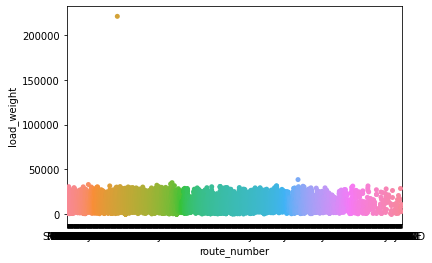

In [ ]:
sns.swarmplot(x ='route_number', y ='load_weight', data = training)

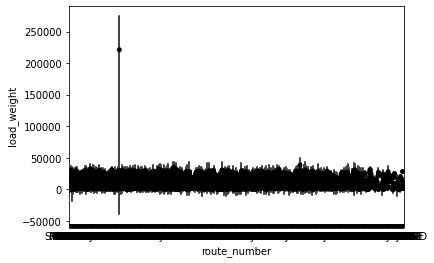

In [ ]:
sns.violinplot(x ='route_number', y ='load_weight', data = training)
sns.swarmplot(x ='route_number', y ='load_weight', data = training,color='black')

# ***MISSING VALUE ANALYSIS***

In [54]:
pd.DataFrame(training.isna().sum())


,0
dropoff_site,0
load_id,0
load_time,0
load_type,0
report_date,0
route_number,0
route_type,0
load_weight,1131


In [55]:
training=training.dropna()

In [56]:
training.shape

(9637, 8)